## **圖表分析**

### 導入必要的庫並讀取資料

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

OPEN = '1. open'
HIGH = '2. high'
LOW = '3. low'
CLOSE = '4. close'
VOLUME = '5. volume'

df = pd.read_csv('data/aapl_intraday_final.csv', index_col=0)

print(df.head())

                  date  1. open  2. high   3. low  4. close  5. volume
0  2024-08-09 19:45:00   163.50   163.80  163.450    163.59     3622.0
1  2024-08-09 19:30:00   163.40   163.65  163.400    163.59      991.0
2  2024-08-09 19:15:00   163.48   163.50  163.343    163.45      468.0
3  2024-08-09 19:00:00   163.48   163.48  163.320    163.40     2014.0
4  2024-08-09 18:45:00   163.39   163.55  163.320    163.33     1062.0


### 資料載入和基本操作

In [2]:
df.info()

print(df.describe())

print(df.tail())

<class 'pandas.core.frame.DataFrame'>
Index: 1408 entries, 0 to 1407
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1408 non-null   object 
 1   1. open    1408 non-null   float64
 2   2. high    1408 non-null   float64
 3   3. low     1408 non-null   float64
 4   4. close   1408 non-null   float64
 5   5. volume  1408 non-null   float64
dtypes: float64(5), object(1)
memory usage: 77.0+ KB
           1. open      2. high       3. low     4. close     5. volume
count  1408.000000  1408.000000  1408.000000  1408.000000  1.408000e+03
mean    173.134379   173.667778   172.554969   173.119058  5.103978e+05
std       9.414513     9.303539     9.731974     9.397897  1.252369e+06
min     155.005000   156.490000   115.685000   155.410000  2.250000e+02
25%     166.192500   166.738250   165.522500   166.247500  6.377250e+03
50%     171.560000   172.045000   171.275000   171.545000  5.567050e+04
75%     181.903000   1

### 資料清理和預處理

In [3]:
df['date'] = pd.to_datetime(df['date'])

price_columns = [OPEN, HIGH, LOW, CLOSE]
df[price_columns] = df[price_columns].astype(float)
df[VOLUME] = df[VOLUME].astype(int)

print("缺失值數量:")
print(df.isnull().sum())

df = df.dropna()

print(df.dtypes)
print(df.tail())

缺失值數量:
date         0
1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64
date         datetime64[ns]
1. open             float64
2. high             float64
3. low              float64
4. close            float64
5. volume             int64
dtype: object
                    date  1. open  2. high  3. low  4. close  5. volume
1403 2024-07-11 05:00:00   190.77   190.82  190.61    190.64       1677
1404 2024-07-11 04:45:00   190.86   190.90  190.73    190.79        860
1405 2024-07-11 04:30:00   190.86   190.91  190.77    190.77       2254
1406 2024-07-11 04:15:00   191.14   191.14  190.80    190.86        946
1407 2024-07-11 04:00:00   191.16   191.18  190.88    191.07       2146


### 基本統計分析

In [4]:
daily_avg = df[price_columns].mean()
print("每日平均價格: ")
print(daily_avg)

max_volumn = df.loc[df[VOLUME].idxmax()]
min_volume = df.loc[df[VOLUME].idxmin()]
print("\n成交量最大的時段: ")
print(max_volumn)
print("\n成交量最小的時段: ")
print(min_volume)

price_std = df[price_columns].std()
price_cv = price_std / df[price_columns].mean()
print("\n價格標準差: ")
print(price_std)
print("\n價格變異係數: ")
print(price_cv)

每日平均價格: 
1. open     173.134379
2. high     173.667778
3. low      172.554969
4. close    173.119058
dtype: float64

成交量最大的時段: 
date         2024-08-06 16:00:00
1. open                   158.31
2. high                  159.495
3. low                    158.15
4. close                  158.38
5. volume               18989899
Name: 207, dtype: object

成交量最小的時段: 
date         2024-07-16 05:45:00
1. open                   187.21
2. high                   187.25
3. low                    187.07
4. close                  187.12
5. volume                    225
Name: 1208, dtype: object

價格標準差: 
1. open     9.414513
2. high     9.303539
3. low      9.731974
4. close    9.397897
dtype: float64

價格變異係數: 
1. open     0.054377
2. high     0.053571
3. low      0.056399
4. close    0.054286
dtype: float64


### 時間序列分析

DataFrame的列:  Index(['date', '1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')
DataFrame的索引:  Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407],
      dtype='int64', length=1408)


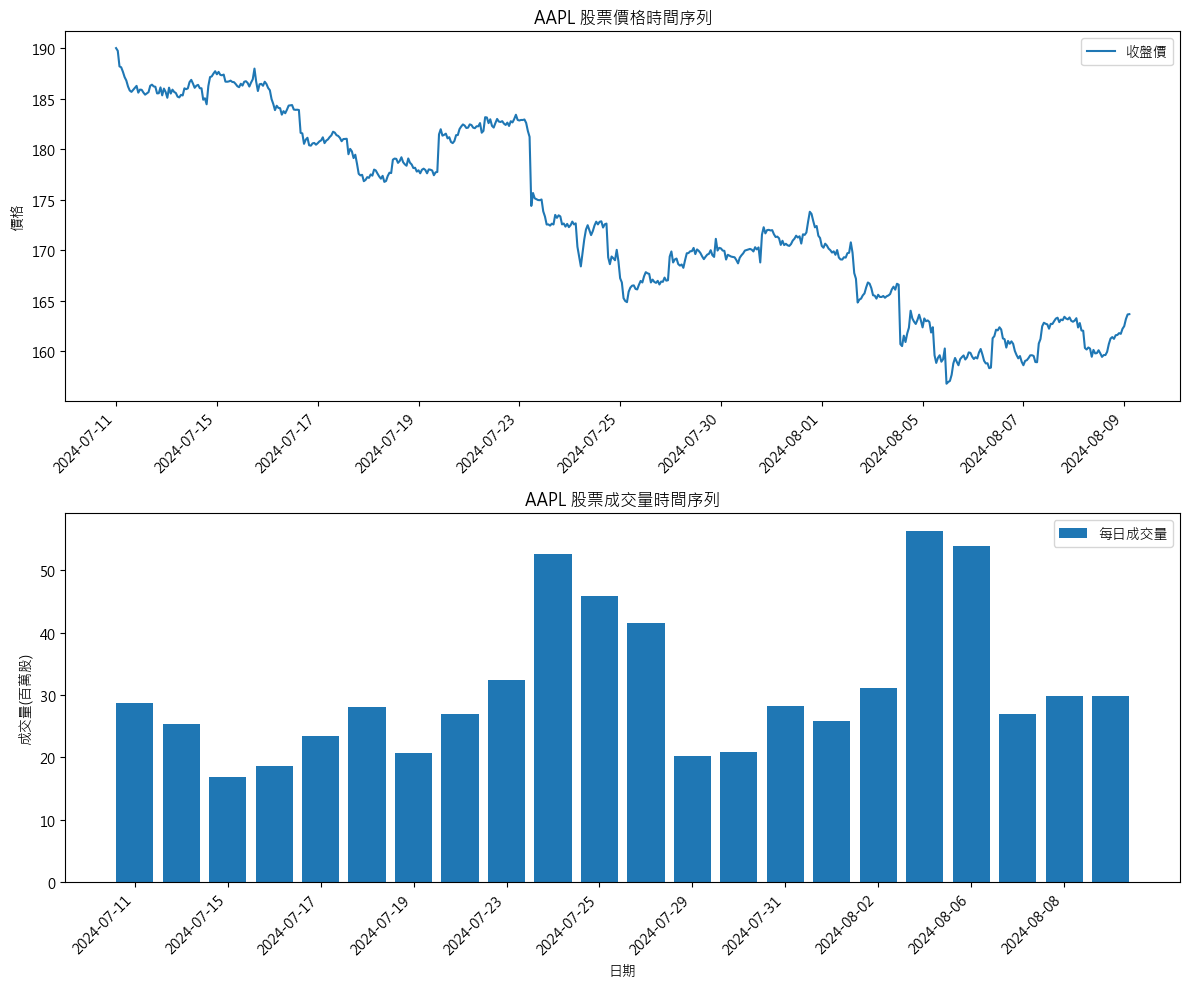

日內收益率統計: 
count    594.000000
mean      -0.000132
std        0.003492
min       -0.019347
25%       -0.001681
50%       -0.000057
75%        0.001578
max        0.034039
Name: returns, dtype: float64


In [5]:
def process_and_plot_stock_data_time_series(df_original):
    df = df_original.copy()
    
    print("DataFrame的列: ", df.columns)
    print("DataFrame的索引: ", df.index)

    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
    else:
        df.index = pd.to_datetime(df.index)
        df = df.reset_index()
        df = df.rename(columns={'index': 'date'})
    
    df = df.sort_values(by='date')

    df['returns'] = df[CLOSE].pct_change()
    df['volume_millions'] = df[VOLUME] / 1_000_000
    
    df = df[df['date'].dt.dayofweek < 5]
    df = df.set_index('date')
    df = df.between_time('09:30', '16:00')

    df = df.reset_index()
    df['x'] = range(len(df))

    plt.rc('font', family='Microsoft JhengHei')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

    ax1.plot(df['x'], df[CLOSE], label='收盤價')
    ax1.set_title('AAPL 股票價格時間序列')
    ax1.set_ylabel('價格')
    ax1.legend()

    num_ticks = 10
    step = max(1, len(df) // num_ticks)
    tick_locations = df['x'][::step]
    tick_labels = df['date'][::step].dt.strftime('%Y-%m-%d')
    
    ax1.set_xticks(tick_locations)
    ax1.set_xticklabels(tick_labels, rotation=45, ha='right')

    daily_volume = df.groupby(df['date'].dt.date)['volume_millions'].sum().reset_index()
    daily_volume['x'] = range(len(daily_volume))
    ax2.bar(daily_volume['x'], daily_volume['volume_millions'], label='每日成交量', width=0.8)
    ax2.set_title('AAPL 股票成交量時間序列')
    ax2.set_xlabel('日期')
    ax2.set_ylabel('成交量(百萬股)')
    ax2.legend()

    # 設置 X 軸刻度和標籤（成交量圖）
    volume_ticks = min(10, len(daily_volume))
    volume_step = max(1, len(daily_volume) // volume_ticks)
    volume_tick_locations = daily_volume['x'][::volume_step]
    volume_tick_labels = daily_volume['date'].astype(str)  # 將日期轉換為字符串
    
    ax2.set_xticks(volume_tick_locations)
    ax2.set_xticklabels(volume_tick_labels[::volume_step], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

    print("日內收益率統計: ")
    print(df['returns'].describe())

# 使用方法
process_and_plot_stock_data_time_series(df)

### 移動平均線計算

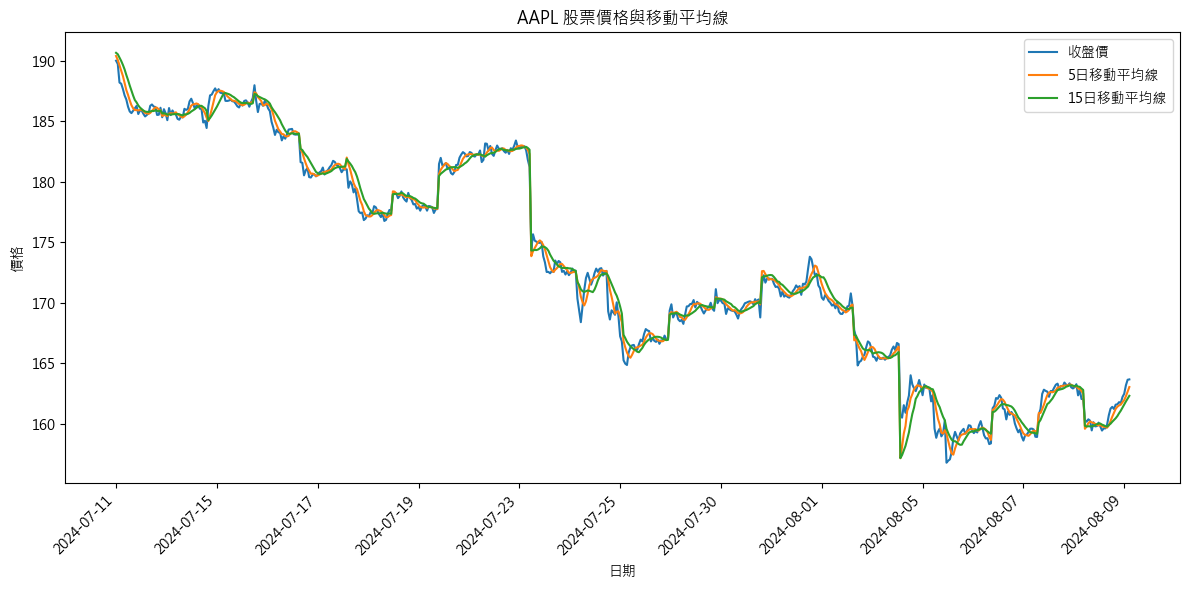

     4. close      MA5      MA10
584   161.225  160.905  160.3090
585   161.580  161.233  160.4575
586   161.610  161.413  160.6395
587   161.790  161.521  160.8745
588   161.720  161.585  161.0845
589   162.220  161.784  161.3445
590   162.480  161.964  161.5985
591   163.185  162.279  161.8460
592   163.640  162.649  162.0850
593   163.670  163.039  162.3120


In [6]:
def process_and_plot_stock_data_moving_average(df_original):
    df = df_original.copy()
    
    if 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])
    else:
        df.index = pd.to_datetime(df.index)
        df = df.reset_index()
        df = df.rename(columns={'index': 'date'})
    
    df = df.sort_values(by='date')
    
    df['MA5'] = df[CLOSE].rolling(window=5).mean()
    df['MA10'] = df[CLOSE].rolling(window=10).mean()
    
    df = df[df['date'].dt.dayofweek < 5]
    df = df.set_index('date')
    df = df.between_time('09:30', '16:00')
    
    df = df.reset_index()
    df['x'] = range(len(df))
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df[CLOSE], label='收盤價')
    ax.plot(df.index, df['MA5'], label='5日移動平均線')
    ax.plot(df.index, df['MA10'], label='15日移動平均線')
    
    num_ticks = 10
    step = max(1, len(df) // num_ticks)
    tick_locations = df['x'][::step]
    tick_labels = df['date'][::step].dt.strftime('%Y-%m-%d')
    
    ax.set_xticks(tick_locations)
    ax.set_xticklabels(tick_labels, rotation=45, ha='right')
     
    plt.title('AAPL 股票價格與移動平均線')
    plt.xlabel('日期')
    plt.ylabel('價格')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 打印最後 10 行數據
    print(df[[CLOSE, 'MA5', 'MA10']].tail(10))

# 使用方法
process_and_plot_stock_data_moving_average(df)

### 價格區間分析

價格波動範圍統計: 
count    1408.000000
mean        1.112808
std         2.541221
min         0.040000
25%         0.340000
50%         0.560000
75%         0.900000
max        56.487000
Name: price_range, dtype: float64

價格波動範圍最大的時段: 
date           2024-07-29 17:00:00
1. open                      169.3
2. high                    172.172
3. low                     115.685
4. close                     169.0
5. volume                    21237
price_range                 56.487
Name: 587, dtype: object


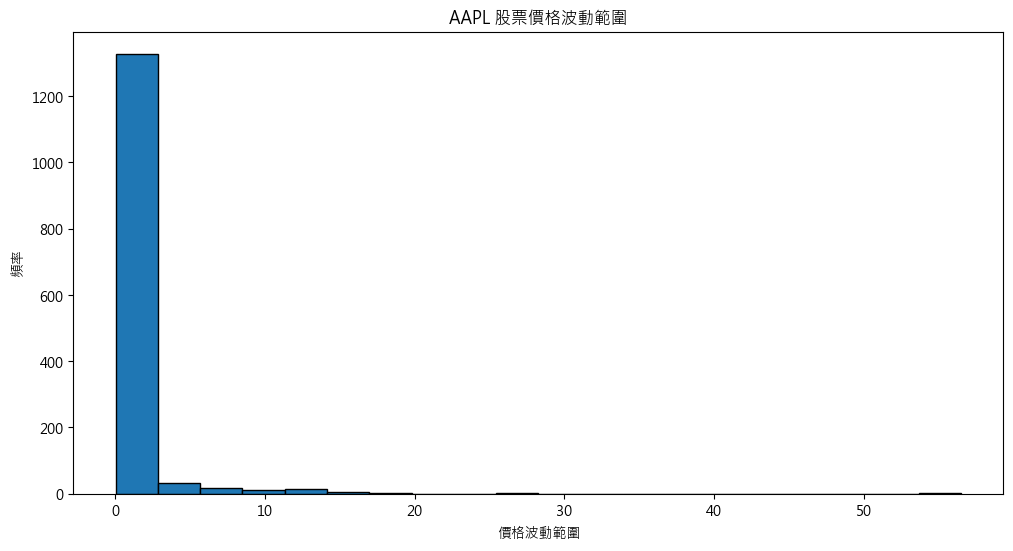


每日價格波動範圍: 
date
2024-07-11    11.248
2024-07-12     6.040
2024-07-13       NaN
2024-07-14       NaN
2024-07-15    10.186
2024-07-16     8.888
2024-07-17    11.678
2024-07-18    15.841
2024-07-19    13.174
2024-07-20       NaN
2024-07-21       NaN
2024-07-22     2.988
2024-07-23    13.000
2024-07-24    10.998
2024-07-25    12.275
2024-07-26     7.892
2024-07-27       NaN
2024-07-28       NaN
2024-07-29    56.487
2024-07-30    13.575
2024-07-31    11.427
2024-08-01     4.840
2024-08-02     4.700
2024-08-03       NaN
2024-08-04       NaN
2024-08-05    16.440
2024-08-06    18.734
2024-08-07    27.345
2024-08-08    16.294
2024-08-09    12.325
Freq: D, Name: price_range, dtype: float64


In [7]:
df['price_range'] = df[HIGH] - df[LOW]

max_range = df.loc[df['price_range'].idxmax()]

print("價格波動範圍統計: ")
print(df['price_range'].describe())

print("\n價格波動範圍最大的時段: ")
print(max_range)

plt.figure(figsize=(12, 6))
plt.hist(df['price_range'], bins=20, edgecolor='black')
plt.title('AAPL 股票價格波動範圍')
plt.xlabel('價格波動範圍')
plt.ylabel('頻率')
plt.show()

daily_range = df.resample('D', on='date')['price_range'].max()

print("\n每日價格波動範圍: ")
print(daily_range)

### 成交量分析

累計成交量統計: 
count    2.200000e+01
mean     3.490859e+08
std      2.223609e+08
min      2.960358e+07
25%      1.522267e+08
50%      3.598444e+08
75%      5.081513e+08
max      7.186401e+08
Name: cumulative_volume, dtype: float64

成交量突破閾值的時段數: 0


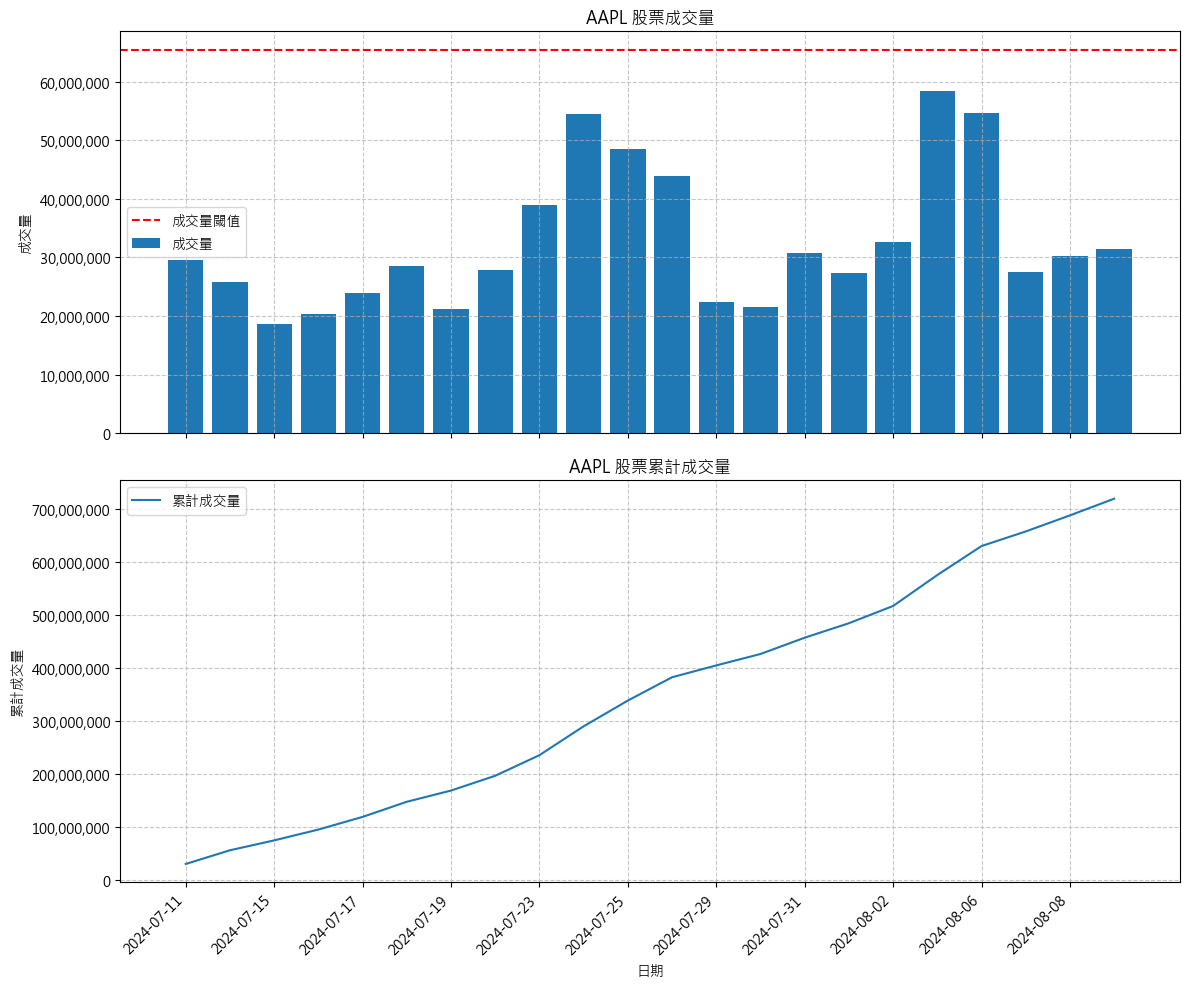

In [8]:
def process_and_plot_stock_data_daily_volume_cumulative(df_original):
    df = df_original.copy()
    
    daily_volume = df.groupby(df['date'].dt.date)[VOLUME].sum().reset_index()
    daily_volume['date'] = pd.to_datetime(daily_volume['date'])
    daily_volume['cumulative_volume'] = daily_volume[VOLUME].cumsum()

    volume_threshold = daily_volume[VOLUME].mean() * 2
    high_volume_periods = daily_volume[daily_volume[VOLUME] > volume_threshold]

    print("累計成交量統計: ")
    print(daily_volume['cumulative_volume'].describe())
    print("\n成交量突破閾值的時段數:", len(high_volume_periods))

    daily_volume['x'] = range(len(daily_volume))
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    ax1.bar(daily_volume['x'], daily_volume[VOLUME], label='成交量')
    ax1.axhline(y=volume_threshold, color='r', linestyle='--', label='成交量閾值')
    ax1.set_title('AAPL 股票成交量')
    ax1.set_ylabel('成交量')
    ax1.legend()

    ax2.plot(daily_volume['x'], daily_volume['cumulative_volume'], label='累計成交量')
    ax2.set_title('AAPL 股票累計成交量')
    ax2.set_xlabel('日期')
    ax2.set_ylabel('累計成交量')
    ax2.legend()

    num_ticks = 10
    step = max(1, len(daily_volume) // num_ticks)
    tick_locations = daily_volume['x'][::step]
    tick_labels = daily_volume['date'][::step].dt.strftime('%Y-%m-%d')
    
    ax1.set_xticks(tick_locations)
    ax1.set_xticklabels(tick_labels, rotation=45, ha='right')
    ax2.set_xticks(tick_locations)
    ax2.set_xticklabels(tick_labels, rotation=45, ha='right')

    ax1.grid(True, linestyle='--', alpha=0.7)
    ax2.grid(True, linestyle='--', alpha=0.7)

    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

    plt.tight_layout()
    plt.show()
    
process_and_plot_stock_data_daily_volume_cumulative(df)

### 相關性分析

價格相關性矩陣: 
           1. open   2. high    3. low  4. close
1. open   1.000000  0.989530  0.980419  0.997751
2. high   0.989530  1.000000  0.965352  0.990411
3. low    0.980419  0.965352  1.000000  0.980240
4. close  0.997751  0.990411  0.980240  1.000000


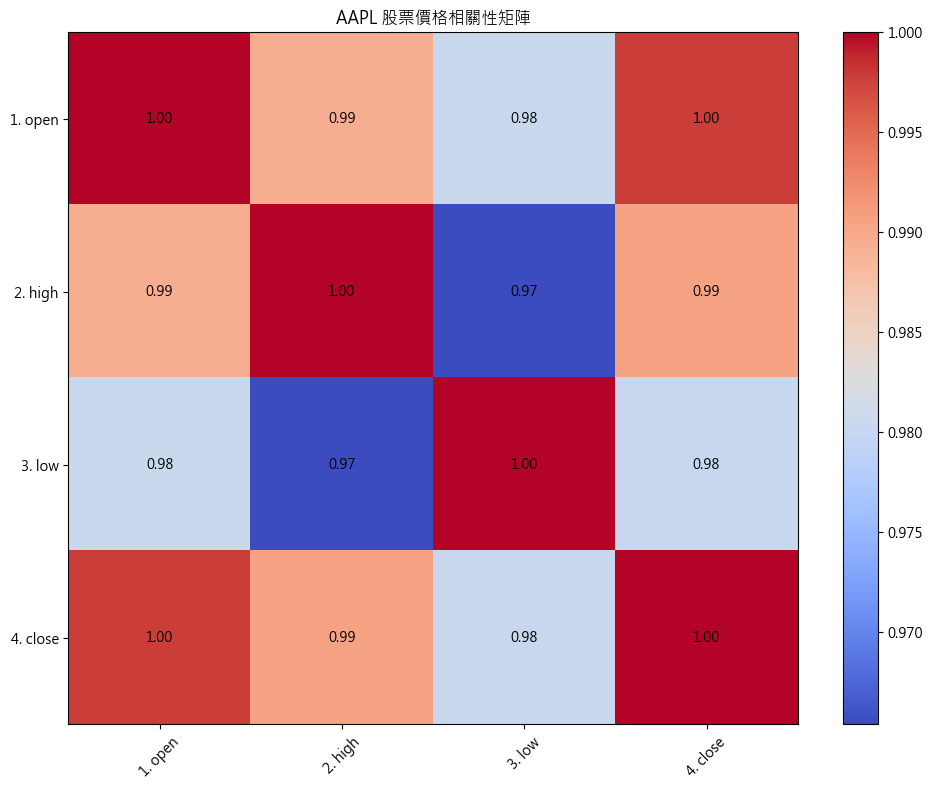

In [9]:
price_columns = [OPEN, HIGH, LOW, CLOSE]
correlation_matrix = df[price_columns].corr()

print("價格相關性矩陣: ")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(price_columns)), price_columns, rotation=45)
plt.yticks(range(len(price_columns)), price_columns)
plt.title('AAPL 股票價格相關性矩陣')

for i in range(len(price_columns)):
    for j in range(len(price_columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                 ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


### 資料重採樣

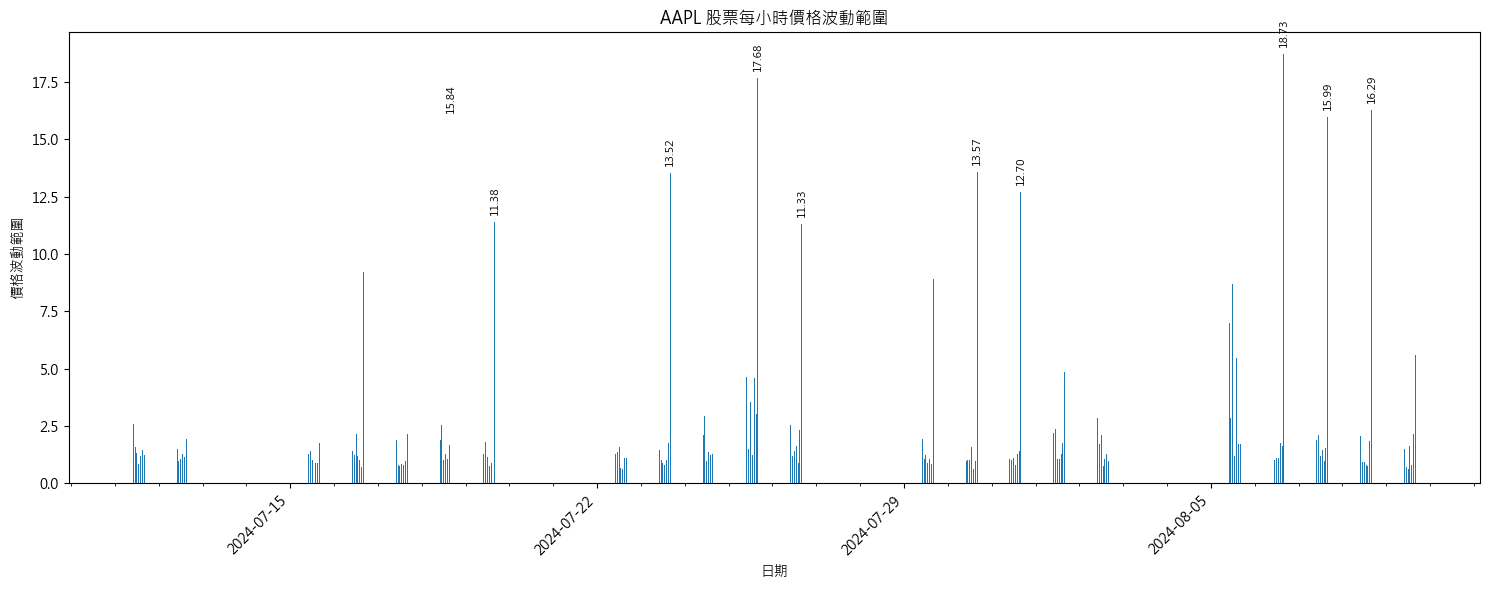

In [10]:
hourly_data = df.resample('h', on='date').agg({
    OPEN: 'first', HIGH: 'max', LOW: 'min', CLOSE: 'last', VOLUME: 'sum'})

hourly_data = hourly_data.reset_index()
hourly_data['price_range'] = hourly_data[HIGH] - hourly_data[LOW]

hourly_data = hourly_data[hourly_data['date'].dt.time.between(pd.Timestamp('09:30').time(), pd.Timestamp('16:00').time())]

fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(hourly_data['date'], hourly_data['price_range'], width=0.02)
ax.set_title('AAPL 股票每小時價格波動範圍')

ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

for label in ax.get_xticklabels(which='major'):
    label.set_rotation(45)
    label.set_ha('right')

threshold = hourly_data['price_range'].mean() + 2 * hourly_data['price_range'].std()
for idx, row in hourly_data[hourly_data['price_range'] > threshold].iterrows():
    ax.annotate(f"{row['price_range']:.2f}", (row['date'], row['price_range']), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom',
                fontsize=8, rotation=90)

ax.set_xlabel('日期')
ax.set_ylabel('價格波動範圍')
plt.tight_layout()
plt.show()

### 條件篩選

價格變動超過 0.5% 的時段數： 102
顯著上漲的時段數： 56
顯著下跌的時段數： 46


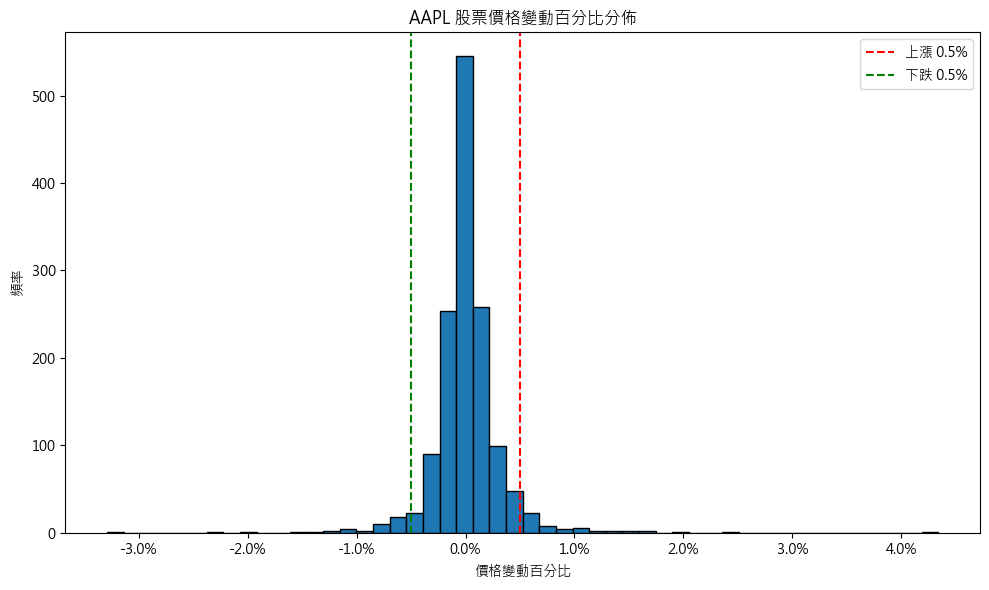

In [11]:
df['price_change_pct'] = df['4. close'].pct_change() * 100

significant_changes = df[abs(df['price_change_pct']) > 0.5]

print("價格變動超過 0.5% 的時段數：", len(significant_changes))

up_periods = len(significant_changes[significant_changes['price_change_pct'] > 0])
down_periods = len(significant_changes[significant_changes['price_change_pct'] < 0])

print("顯著上漲的時段數：", up_periods)
print("顯著下跌的時段數：", down_periods)

plt.figure(figsize=(10, 6))
plt.hist(df['price_change_pct'], bins=50, edgecolor='black')
plt.title('AAPL 股票價格變動百分比分佈')
plt.xlabel('價格變動百分比')
plt.ylabel('頻率')
plt.axvline(x=0.5, color='r', linestyle='--', label='上漲 0.5%')
plt.axvline(x=-0.5, color='g', linestyle='--', label='下跌 0.5%')
plt.legend()

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.1f}%"))

plt.tight_layout()
plt.show()

## **指標計算**

### 計算移動平均線

In [12]:
def moving_average(data, window):
    weights = np.ones(window) / window
    return np.convolve(data, weights, mode='valid')

close_prices = df[CLOSE].values
ma_20 = moving_average(close_prices, window=20)
ma_50 = moving_average(close_prices, window=50)

print("20日移動平均線: ", ma_20)
print("50日移動平均線: ", ma_50)

20日移動平均線:  [163.29875 163.20525 163.11525 ... 190.7276  190.7771  190.8102 ]
50日移動平均線:  [161.4654  161.4098  161.3592  ... 188.16856 188.26506 188.36266]


### 計算波動率

In [13]:
returns = np.diff(np.log(df[CLOSE].values))
volatility = np.std(returns) * np.sqrt(252)

print("波動率: ", volatility)

波動率:  0.05259359937626899


### 計算RSI

In [14]:
def compute_rsi(prices, period=14):
    deltas = np.diff(prices)
    seed = deltas[:period+1]
    up = seed[seed >= 0].sum() / period
    down = -seed[seed < 0].sum() / period
    rs = up / down
    rsi = np.zeros_like(prices)
    rsi[:period] = 100 - (100 / (1 + rs))
    
    for i in range(period, len(prices)):
        delta = deltas[i-1]
        if delta > 0:
            upval = delta
            downval = 0
        else:
            upval = 0
            downval = -delta
        up = (up * (period - 1) + upval) / period
        down = (down * (period - 1) + downval) / period
        rs = up / down
        rsi[i] = 100 - (100 / (1 + rs))
    return rsi

close_prices = df[CLOSE].values
rsi_20 = compute_rsi(close_prices, period=20)
rsi_50 = compute_rsi(close_prices, period=50)

print("20日RSI: ", rsi_20)
print("50日RSI: ", rsi_50)

20日RSI:  [28.77358491 28.77358491 28.77358491 ... 69.00586255 69.6934467
 71.25945645]
50日RSI:  [41.33561644 41.33561644 41.33561644 ... 63.92539214 64.21212201
 64.87680723]


### 計算Bollinger Bands

In [15]:
def bollinger_bands(prices, window=20, num_std=2):
    rolling_mean = np.convolve(prices, np.ones(window), 'valid') / window
    rolling_std = np.array([np.std(prices[i:i+window]) for i in range(len(prices)-window+1)])
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return rolling_mean, upper_band, lower_band

close_prices = df[CLOSE].values
rolling_mean, upper_band, lower_band = bollinger_bands(close_prices, window=20, num_std=2)

print("上軌: ", upper_band)
print("中軌: ", rolling_mean)
print("下軌: ", lower_band)

上軌:  [164.0295706  164.19553014 164.26382945 ... 191.29998707 191.19451629
 191.20990619]
中軌:  [163.29875 163.20525 163.11525 ... 190.7276  190.7771  190.8102 ]
下軌:  [162.5679294  162.21496986 161.96667055 ... 190.15521293 190.35968371
 190.41049381]


### 回測簡單的交易策略

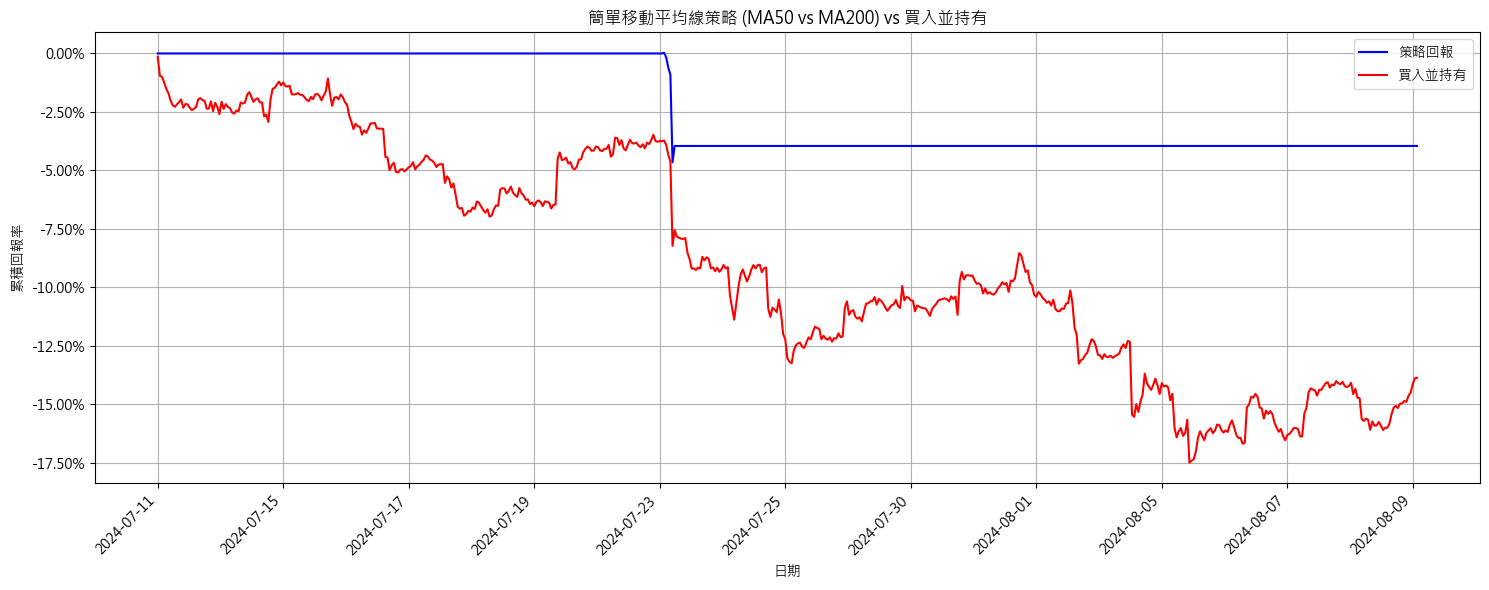

總回報率: -3.95%
年化回報率: -1.70%
夏普比率: -0.66


In [16]:
def simple_moving_average_strategy(prices, short_window=50, long_window=200):
    signals = np.zeros(len(prices))
    short_ma = np.convolve(prices, np.ones(short_window), 'valid') / short_window
    long_ma = np.convolve(prices, np.ones(long_window), 'valid') / long_window
    
    start = long_window - 1
    end = len(long_ma) + start
    
    signals[start:end] = np.where(short_ma[start-short_window+1:] > long_ma, 1, 0)
    
    return signals

def process_and_plot_backtest_results(df, close_column, short_window=50, long_window=200):
    df = df.copy()

    df = df.sort_values(by='date')
    
    # 只保留交易日的數據
    df = df[df['date'].dt.dayofweek < 5]
    df = df.set_index('date')
    df = df.between_time('09:30', '16:00')
    df = df.reset_index()
    
    close_prices = df[close_column].values
    signals = simple_moving_average_strategy(close_prices, short_window, long_window)
    returns = np.diff(close_prices) / close_prices[:-1]
    strategy_returns = signals[:-1] * returns
    cumulative_returns = np.cumprod(1 + strategy_returns) - 1
    buy_and_hold_returns = np.cumprod(1 + returns) - 1
    
    df = df.iloc[1:]  # 移除第一行,因為 returns 比原始數據少一個元素
    df['cumulative_returns'] = cumulative_returns
    df['buy_and_hold_returns'] = buy_and_hold_returns
    
    # 添加 x 軸索引
    df['x'] = range(len(df))
    
    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] + plt.rcParams['font.sans-serif']
    plt.rcParams['axes.unicode_minus'] = False 
    
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.plot(df['x'], df['cumulative_returns'], label='策略回報', color='blue')
    ax.plot(df['x'], df['buy_and_hold_returns'], label='買入並持有', color='red')
    ax.set_title(f'簡單移動平均線策略 (MA{short_window} vs MA{long_window}) vs 買入並持有')
    ax.set_xlabel('日期')
    ax.set_ylabel('累積回報率')
    ax.legend()
    ax.grid(True)
    
    # 設置 x 軸刻度和標籤
    num_ticks = 10
    step = max(1, len(df) // num_ticks)
    tick_locations = df['x'][::step]
    tick_labels = df['date'][::step].dt.strftime('%Y-%m-%d')
    
    ax.set_xticks(tick_locations)
    ax.set_xticklabels(tick_labels, rotation=45, ha='right')
    
    # 調整 y 軸顯示
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.2%}'.format(y)))
    
    plt.tight_layout()
    plt.show()
    
    total_return = cumulative_returns[-1]
    annualized_return = (1 + total_return) ** (252 / len(returns)) - 1 
    sharpe_ratio = np.sqrt(252) * np.mean(strategy_returns) / np.std(strategy_returns)
    
    print(f"總回報率: {total_return:.2%}")
    print(f"年化回報率: {annualized_return:.2%}")
    print(f"夏普比率: {sharpe_ratio:.2f}")

# 使用方法
process_and_plot_backtest_results(df, CLOSE, short_window=50, long_window=200)

## TimeSeriesDB (InfluxDB)

In [18]:
from influxdb_client import InfluxDBClient, Point
from influxdb_client.client.write_api import SYNCHRONOUS

csv_path = "./data/aapl_intraday_final.csv"
df = pd.read_csv(csv_path)

influx_url = "http://localhost:8086"
token = "wuoQUmE468lLJahw6Yj3ayrGVObB9kzsNPd_1FqxqMAqJB3nifgGlQ1qCOSbGejnBQGzOVkr9RZLO4aaKPVRag=="
org = "myorg"
bucket = "mybucket"

### 將股票數據寫入InfluxDB

In [17]:
from influxdb_client import InfluxDBClient, Point
from influxdb_client.client.write_api import SYNCHRONOUS

client = InfluxDBClient(url=influx_url, token=token, org=org)
write_api = client.write_api(write_options=SYNCHRONOUS)
query_api = client.query_api()

start_time = df['date'].min()
end_time = df['date'].max()

query = f'from(bucket:"{bucket}") |> range(start: {start_time}, stop: {end_time}) |> filter(fn: (r) => r._measurement == "stock_data" and r.symbol == "AAPL")'
result = query_api.query(query)

existing_dates = set(table.records[0].values.get("_time") for table in result)

points = []
for index, row in df.iterrows():
    if row['date'] not in existing_dates:
        point = Point("stock_data") \
            .tag("symbol", "AAPL") \
            .field("open", float(row['1. open'])) \
            .field("high", float(row['2. high'])) \
            .field("low", float(row['3. low'])) \
            .field("close", float(row['4. close'])) \
            .field("volume", int(row['5. volume'])) \
            .time(row['date'])
        points.append(point)

if points:
    write_api.write(bucket=bucket, record=points)

client.close()

print("新數據已成功寫入 InfluxDB")

數據已成功寫入 InfluxDB


### 計算每日股票收盤價的移動平均線

DataFrame 的列： Index(['result', 'table', '_start', '_stop', '_time', '_value', '_field',
       '_measurement', 'symbol'],
      dtype='object')
DataFrame 的前幾行：
  result  table                    _start                     _stop  \
0   mean      0 2024-07-11 00:00:00+00:00 2024-08-10 23:59:59+00:00   
1   mean      0 2024-07-11 00:00:00+00:00 2024-08-10 23:59:59+00:00   
2   mean      0 2024-07-11 00:00:00+00:00 2024-08-10 23:59:59+00:00   
3   mean      0 2024-07-11 00:00:00+00:00 2024-08-10 23:59:59+00:00   
4   mean      0 2024-07-11 00:00:00+00:00 2024-08-10 23:59:59+00:00   

                      _time   _value _field _measurement symbol  
0 2024-07-12 00:00:00+00:00  185.258  close   stock_data   AAPL  
1 2024-07-13 00:00:00+00:00  184.834  close   stock_data   AAPL  
2 2024-07-14 00:00:00+00:00      NaN  close   stock_data   AAPL  
3 2024-07-15 00:00:00+00:00      NaN  close   stock_data   AAPL  
4 2024-07-16 00:00:00+00:00  187.551  close   stock_data   AAPL  

處理後的數據：
        

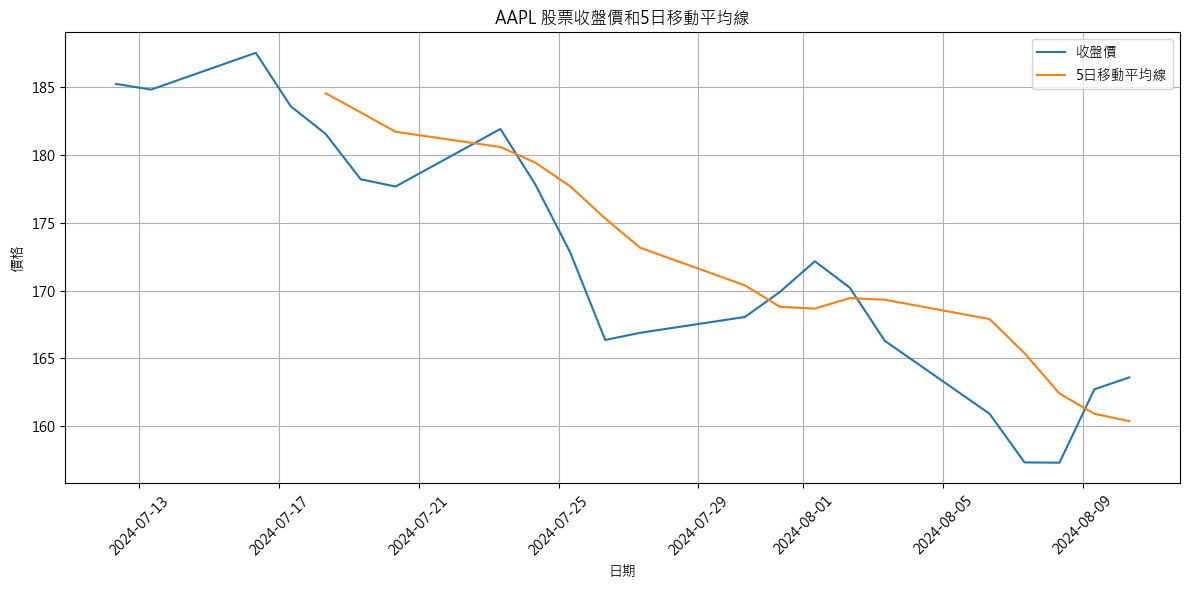

In [44]:
import warnings
from influxdb_client.client.warnings import MissingPivotFunction
import pandas as pd
import matplotlib.pyplot as plt

# 忽略 MissingPivotFunction 警告
warnings.simplefilter("ignore", MissingPivotFunction)

client = InfluxDBClient(url=influx_url, token=token, org=org)
query_api = client.query_api()

# 設定查詢的時間範圍
start_time = "2024-07-11T00:00:00Z"
stop_time = "2024-08-10T23:59:59Z"

query = f'''
from(bucket:"{bucket}")
  |> range(start: {start_time}, stop: {stop_time})
  |> filter(fn: (r) => r._measurement == "stock_data" and r._field == "close")
  |> aggregateWindow(every: 1d, fn: last)
  |> yield(name: "mean")
'''

result = query_api.query_data_frame(query)

if isinstance(result, pd.DataFrame) and not result.empty:
    print("DataFrame 的列：", result.columns)
    print("DataFrame 的前幾行：")
    print(result.head())

    result.set_index('_time', inplace=True)
    
    result.sort_index(inplace=True)
    
    result = result[['_value']]
 
    result.columns = ['close']
    
    result.index = pd.to_datetime(result.index).tz_convert('Asia/Taipei')
    
    result = result.dropna()
    
    result['MA5'] = result['close'].rolling(window=5).mean()

    print("\n處理後的數據:")
    print(result.head(10))
    
    # 繪製圖表
    plt.figure(figsize=(12, 6))
    plt.plot(result.index, result['close'], label='收盤價')
    plt.plot(result.index, result['MA5'], label='5日移動平均線')
    plt.title('AAPL 股票收盤價和5日移動平均線')
    plt.xlabel('日期')
    plt.ylabel('價格')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("查詢結果為空")

client.close()

### 分析股票成交量的週期性模式

In [67]:
query = f'''
from(bucket:"{bucket}")
  |> range(start: -90d)
  |> filter(fn: (r) => r._measurement == "stock_data" and r._field == "volume")
  |> aggregateWindow(every: 1d, fn: sum)
  |> filter(fn: (r) => exists r._value)
  |> yield(name: "sum")
'''

result = query_api.query_data_frame(query)
df = pd.DataFrame(result)

# 將日期轉換為星期幾
df['day_of_week'] = pd.to_datetime(df['_time']).dt.dayofweek

# 計算每個星期幾的平均成交量
weekly_pattern = df.groupby('day_of_week')['_value'].mean()

print(weekly_pattern)

day_of_week
1    31791424.25
2    33889571.25
3    34158307.75
4    32854298.80
5    31002276.20
Name: _value, dtype: float64


### 計算股票價格的波動性 (標準差)

In [65]:
query = f'''
from(bucket:"{bucket}")
  |> range(start: -60d)
  |> filter(fn: (r) => r._measurement == "stock_data" and r._field == "close")
  |> aggregateWindow(every: 1d, fn: last)
  |> filter(fn: (r) => exists r._value)
  |> yield(name: "last")
'''

result = query_api.query_data_frame(query)
df = pd.DataFrame(result)

df['volatility'] = df['_value'].rolling(window=10).std()

df_filtered = df.dropna(subset=['volatility'])

df_filtered['_time'] = pd.to_datetime(df_filtered['_time'])

df_filtered = df_filtered.set_index('_time').sort_index()

print(df_filtered[['_value', 'volatility']])

                            _value  volatility
_time                                         
2024-07-25 00:00:00+00:00  172.800    4.467220
2024-07-26 00:00:00+00:00  166.350    6.192379
2024-07-27 00:00:00+00:00  166.880    6.945660
2024-07-30 00:00:00+00:00  168.050    6.515646
2024-07-31 00:00:00+00:00  169.900    6.043763
2024-08-01 00:00:00+00:00  172.160    5.460833
2024-08-02 00:00:00+00:00  170.210    5.222050
2024-08-03 00:00:00+00:00  166.290    5.179457
2024-08-06 00:00:00+00:00  160.900    4.592922
2024-08-07 00:00:00+00:00  157.310    4.854060
2024-08-08 00:00:00+00:00  157.287    5.284477
2024-08-09 00:00:00+00:00  162.710    5.346996
2024-08-10 00:00:00+00:00  163.590    5.331262


C:\Users\Hank\AppData\Local\Temp\ipykernel_75972\2715519672.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['_time'] = pd.to_datetime(df_filtered['_time'])


### 識別股票價格的異常值

In [69]:
query = f'''
from(bucket:"{bucket}")
  |> range(start: -90d)
  |> filter(fn: (r) => r._measurement == "stock_data" and r._field == "close")
  |> aggregateWindow(every: 1d, fn: last)
  |> filter(fn: (r) => exists r._value)
  |> yield(name: "last")
'''

result = query_api.query_data_frame(query)
df = pd.DataFrame(result)

# 計算 Z-score
df['z_score'] = (df['_value'] - df['_value'].mean()) / df['_value'].std()

# 識別異常值 (Z-score 的絕對值大於 3)
df['is_outlier'] = np.abs(df['z_score']) > 3

print(df[df['is_outlier']][['_time', '_value', 'z_score']])

Empty DataFrame
Columns: [_time, _value, z_score]
Index: []
